## 實現深度神經網路DNN

### 深度神經網路

* 是機器學習中一種基於對資料進行表徵學習的演算法
* 用非監督式或半監督式的特徵學習和分層特徵提取高效演算法來替代手工取得特徵

#### 資料集

Fashion_mnist 


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn,pandas as pd
import os

In [2]:
%matplotlib inline

In [3]:
fashion_minst = tf.keras.datasets.fashion_mnist

In [4]:
(train_imgs,train_labels),(test_imgs,test_labels) = fashion_minst.load_data()

In [5]:
train_imgs.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_imgs.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
#將訓練集資料再細分成訓練集(55000)跟驗證集(5000)
x_valid, x_train = train_imgs[:5000], train_imgs[5000:]
y_valid, y_train = train_labels[:5000], train_labels[5000:]

In [10]:
print(x_train[0].dtype)
print(x_train[0])
print(y_train[0])#為數字編碼,非數字編碼＝＞損失函數設為 sparse_categorical_crossentropy
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(test_imgs.shape, test_labels.shape)

uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 198 198 201 

In [11]:
print(np.max(x_train), np.min(x_train))

255 0


##### 進行歸一化Normalization處理

原始資料的數據按比例縮放於 [0, 1] 區間中，且不改變其原本分佈

* 提升模型的收斂速度
* 提高模型的精準度

公式: 

* Z分數標準化(Z-Score Standardization) :  X = (X - X_mean) / std
* 最小值最大值正規化(Min-Max Normalization) :  X = (X - X_min) / (X_max - X_min) 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 因fit_transform要求二維資料,故先將先轉成二維再轉成三維
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
test_scaled = scaler.transform(test_imgs.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [13]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


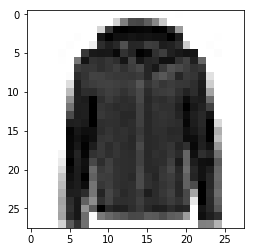

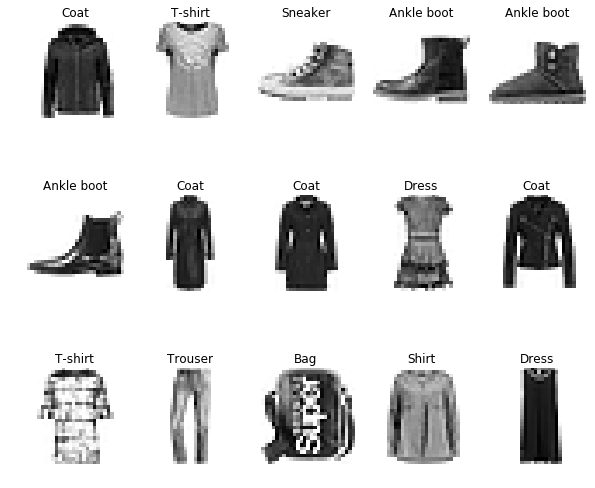

In [14]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") #cmap:将标准化标量映射为颜色, binary代表白底黑字
    plt.show()
show_single_image(x_train[0])


def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 2, n_rows * 3))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

##### 構建模型

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28])) #先把資料打平成一維


In [16]:
#建立15層
for i in range(20):
    model.add(tf.keras.layers.Dense(100,activation='selu')) #selu函數自帶數據歸一化功能，在某程度上也能缓解梯度消失問題
 

    

In [17]:

#AlphaDropout優點: 
#1.平均值和標準差不變：一般的dropout在dropout之後可能激活值發布就發生變化，但是alphadropout並不會
#2.歸一化性質不變：因平均值和標準差不變 可以结合bn、selu来使用，因不會導致分布發生變化

model.add(tf.keras.layers.AlphaDropout(rate=0.5))
#model.add(keras.layers.Dropout(rate=0.3))
          
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [18]:
##### 編譯模型

In [19]:
model.compile(loss= "sparse_categorical_crossentropy",optimizer= "adam", metrics = ["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [21]:
#Tensorflow中的Callback用於模型訓練過程中的監聽動作，常用的callback類型：
#Tensorboard 可視覺化Tensorboard
#earlystopping 當loss函数不能再優化時停止訓練模型,藉此截取到最優惠的模型參數
#ModelCheckpoint 每次epoch之後就保存模型


#新增callbacks資料夾並建立fashion_mnist_model.h5檔案

logdir = os.path.join("Dnn-callbacks")

if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir,"fashion_mnist_model")
    
callbacks = [
    tf.keras.callbacks.TensorBoard(logdir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [22]:
history=model.fit(x_train_scaled, y_train, epochs=10, #epochs用于遍历训练集次数
                  validation_data=(x_valid_scaled,y_valid),#加入验证集，每隔一段时间就对验证集进行验证
                  callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54496/55000 [============================>.] - ETA: 0s - loss: 0.8323 - accuracy: 0.7177WARNING:tensorflow:From C:\Users\NickLin\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Dnn-callbacks\fashion_mnist_model\assets
55000/55000 [==============================] - 8s 149us/sample - loss: 0.8337 - accuracy: 0.7172 - val_loss: 0.9220 - val_accuracy: 0.7480
Epoch 2/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.7092 - accuracy: 0.7631 - val_loss: 0.6846 - val_accuracy: 0.8236
Epoch 3/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.6114 - accuracy: 

##### 繪製學習曲線

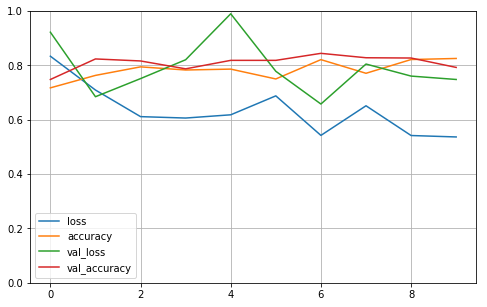

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True) 
    plt.gca().set_ylim(0,1)
    plt.show()
                                       
plot_learning_curves(history)

In [24]:
from tensorflow.keras.models import load_model
model = load_model('Dnn-callbacks/fashion_mnist_model')

In [25]:
a = model.predict(test_imgs)

In [26]:
a[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
class_names[np.argmax(a[0])]

'Ankle boot'